<a href="https://colab.research.google.com/github/faiggafarov/urbanSoundClassification/blob/main/urbanSoundClassification_Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Project Specific Libraries

import os
import glob 
import skimage
import librosa
import librosa.display
import parser


**Veri Setinin İncelenmesi**



In [ ]:
df = pd.read_csv("UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


**Ses dosyaları**

In [ ]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/audio/fold1/7061-6-0-0.wav')
dat2, sampling_rate2 = librosa.load('/content/drive/MyDrive/audio/fold1/7383-3-0-0.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

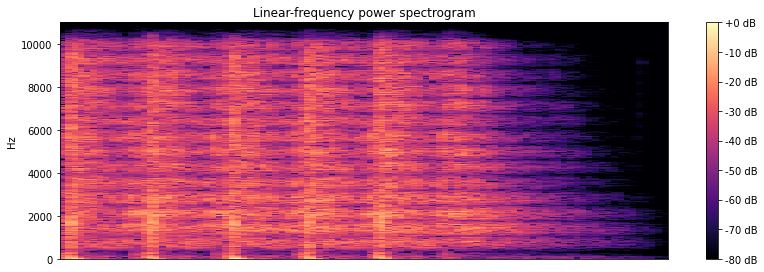

In [ ]:
plt.figure(figsize=(30, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

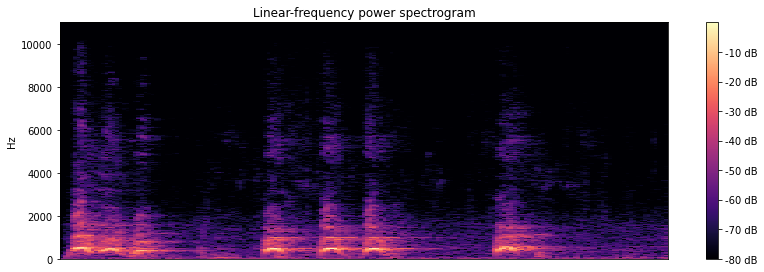

In [ ]:
plt.figure(figsize=(30, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

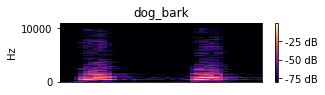

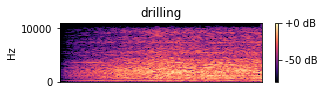

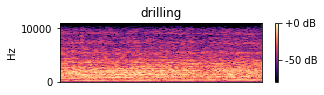

In [ ]:
import random

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
clas = np.array(df["class"])

for i in range(194,199,2):
    path = '/content/drive/MyDrive/audio/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(clas[i])

In [ ]:
data1, sampling_rate1 = librosa.load('/content/drive/MyDrive/audio/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 97)

In [ ]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '/content/drive/MyDrive/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

We used the parser function to analyze the correct syntax of the code




In [ ]:
temp = parser(df)

In [ ]:
temp = np.array(temp)
data = temp.transpose()

In [ ]:
X1= data[:, 0]
Y = data[:, 1]

print(X1.shape, Y.shape)
X = np.empty([8732, 128])

In [ ]:
for i in range(8):
    X[i] = (X1[i])

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
X1train, X1test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X1train = X1train.reshape(6549, 16, 8, 1)
X1test = X1test.reshape(2183, 16, 8, 1)

**Input Shape**


In [ ]:
input_dim = (16, 8, 1)